Karate Club Graph is a social network of a university karate club, described in the paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary, published in 1977. The graph represents the relationships between members of the club, where nodes represent individuals and edges represent social interactions or friendships between them.

In [18]:
# all imports here
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [17]:
# setting matplotlib with latex styles
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True,
                    "font.family": "serif",
                    "font.serif": ["Computer Modern Roman"],
                    "font.size": 12,
                    "pgf.preamble": [r"\usepackage[utf8]{inputenc}",
                                     r"\usepackage[T1]{fontenc}"]})

In [ ]:
# -------------------------
# NetworkX simulations
# -------------------------
# Barabási-Albert scale-free network
import networkx as nx
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Function to generate a Barabási-Albert scale-free network
def gen_ba(n=100, m=2, seed=42):
    return nx.barabasi_albert_graph(n, m, seed=seed)
# Example usage
# G = gen_ba(n=100, m=2, seed=42)


In [ ]:
# load karate club graph
G_karate = nx.karate_club_graph()
# print basic info
def basic_metrics(G):
    info = {
        'nodes': G.number_of_nodes(),
        'edges': G.number_of_edges(),
        'avg_degree': sum(dict(G.degree()).values()) / G.number_of_nodes(),
        'avg_clustering': nx.average_clustering(G),
        'assortativity_deg': nx.degree_assortativity_coefficient(G),
        'connected': nx.is_connected(G),
    }
    H = G if nx.is_connected(G) else G.subgraph(max(nx.connected_components(G), key=len)).copy()
    info['avg_path_length'] = nx.average_shortest_path_length(H)
    info['diameter'] = nx.diameter(H)
    return info

print(basic_metrics(G_karate))

NameError: name 'adjacency_graph' is not defined

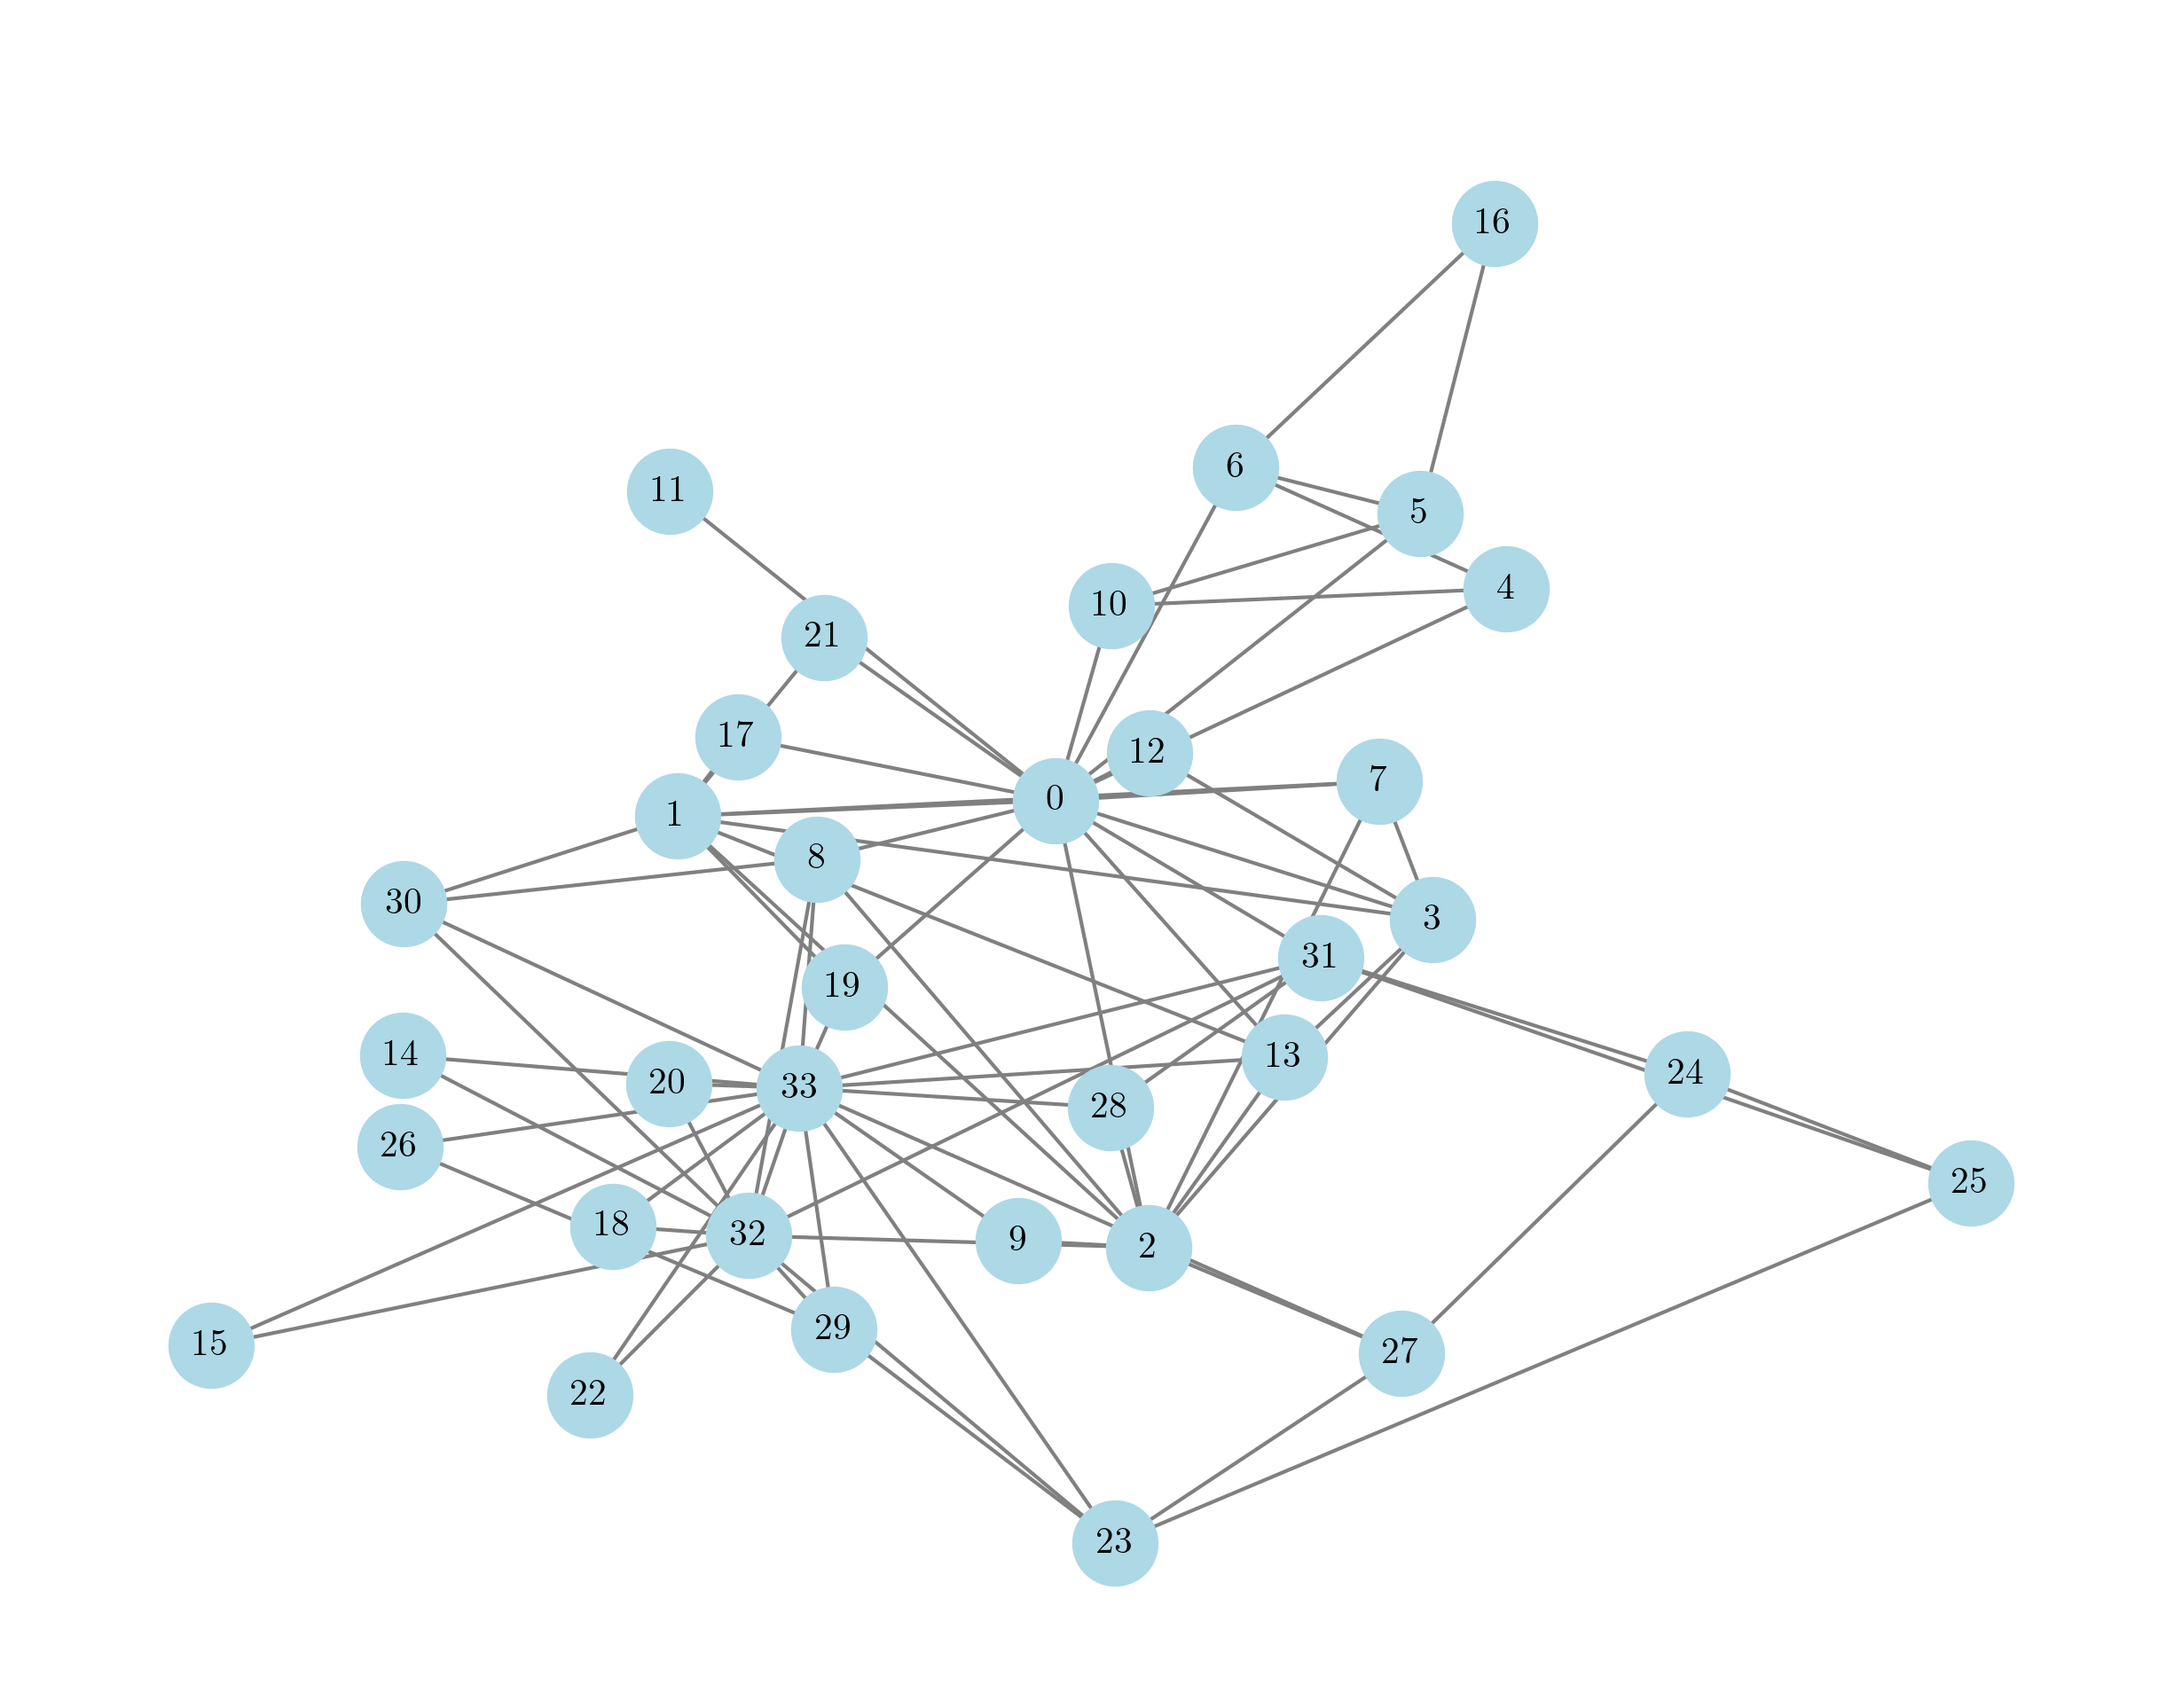

In [38]:

# Draw the graph
plt.figure(figsize=(8, 6),
           dpi=300)
#pos = nx.spring_layout(G_karate, seed=42)  # positions for all nodes
# possible alternatives: kamada_kawai_layout, circular_layout, random_layout, shell_layout
pos = nx.kamada_kawai_layout(G_karate)
# pos = nx.circular_layout(G_karate)
# pos = nx.random_layout(G_karate)
# pos = nx.shell_layout(G_karate)
nx.draw(G_karate, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Karate Club Graph")
plt.show()

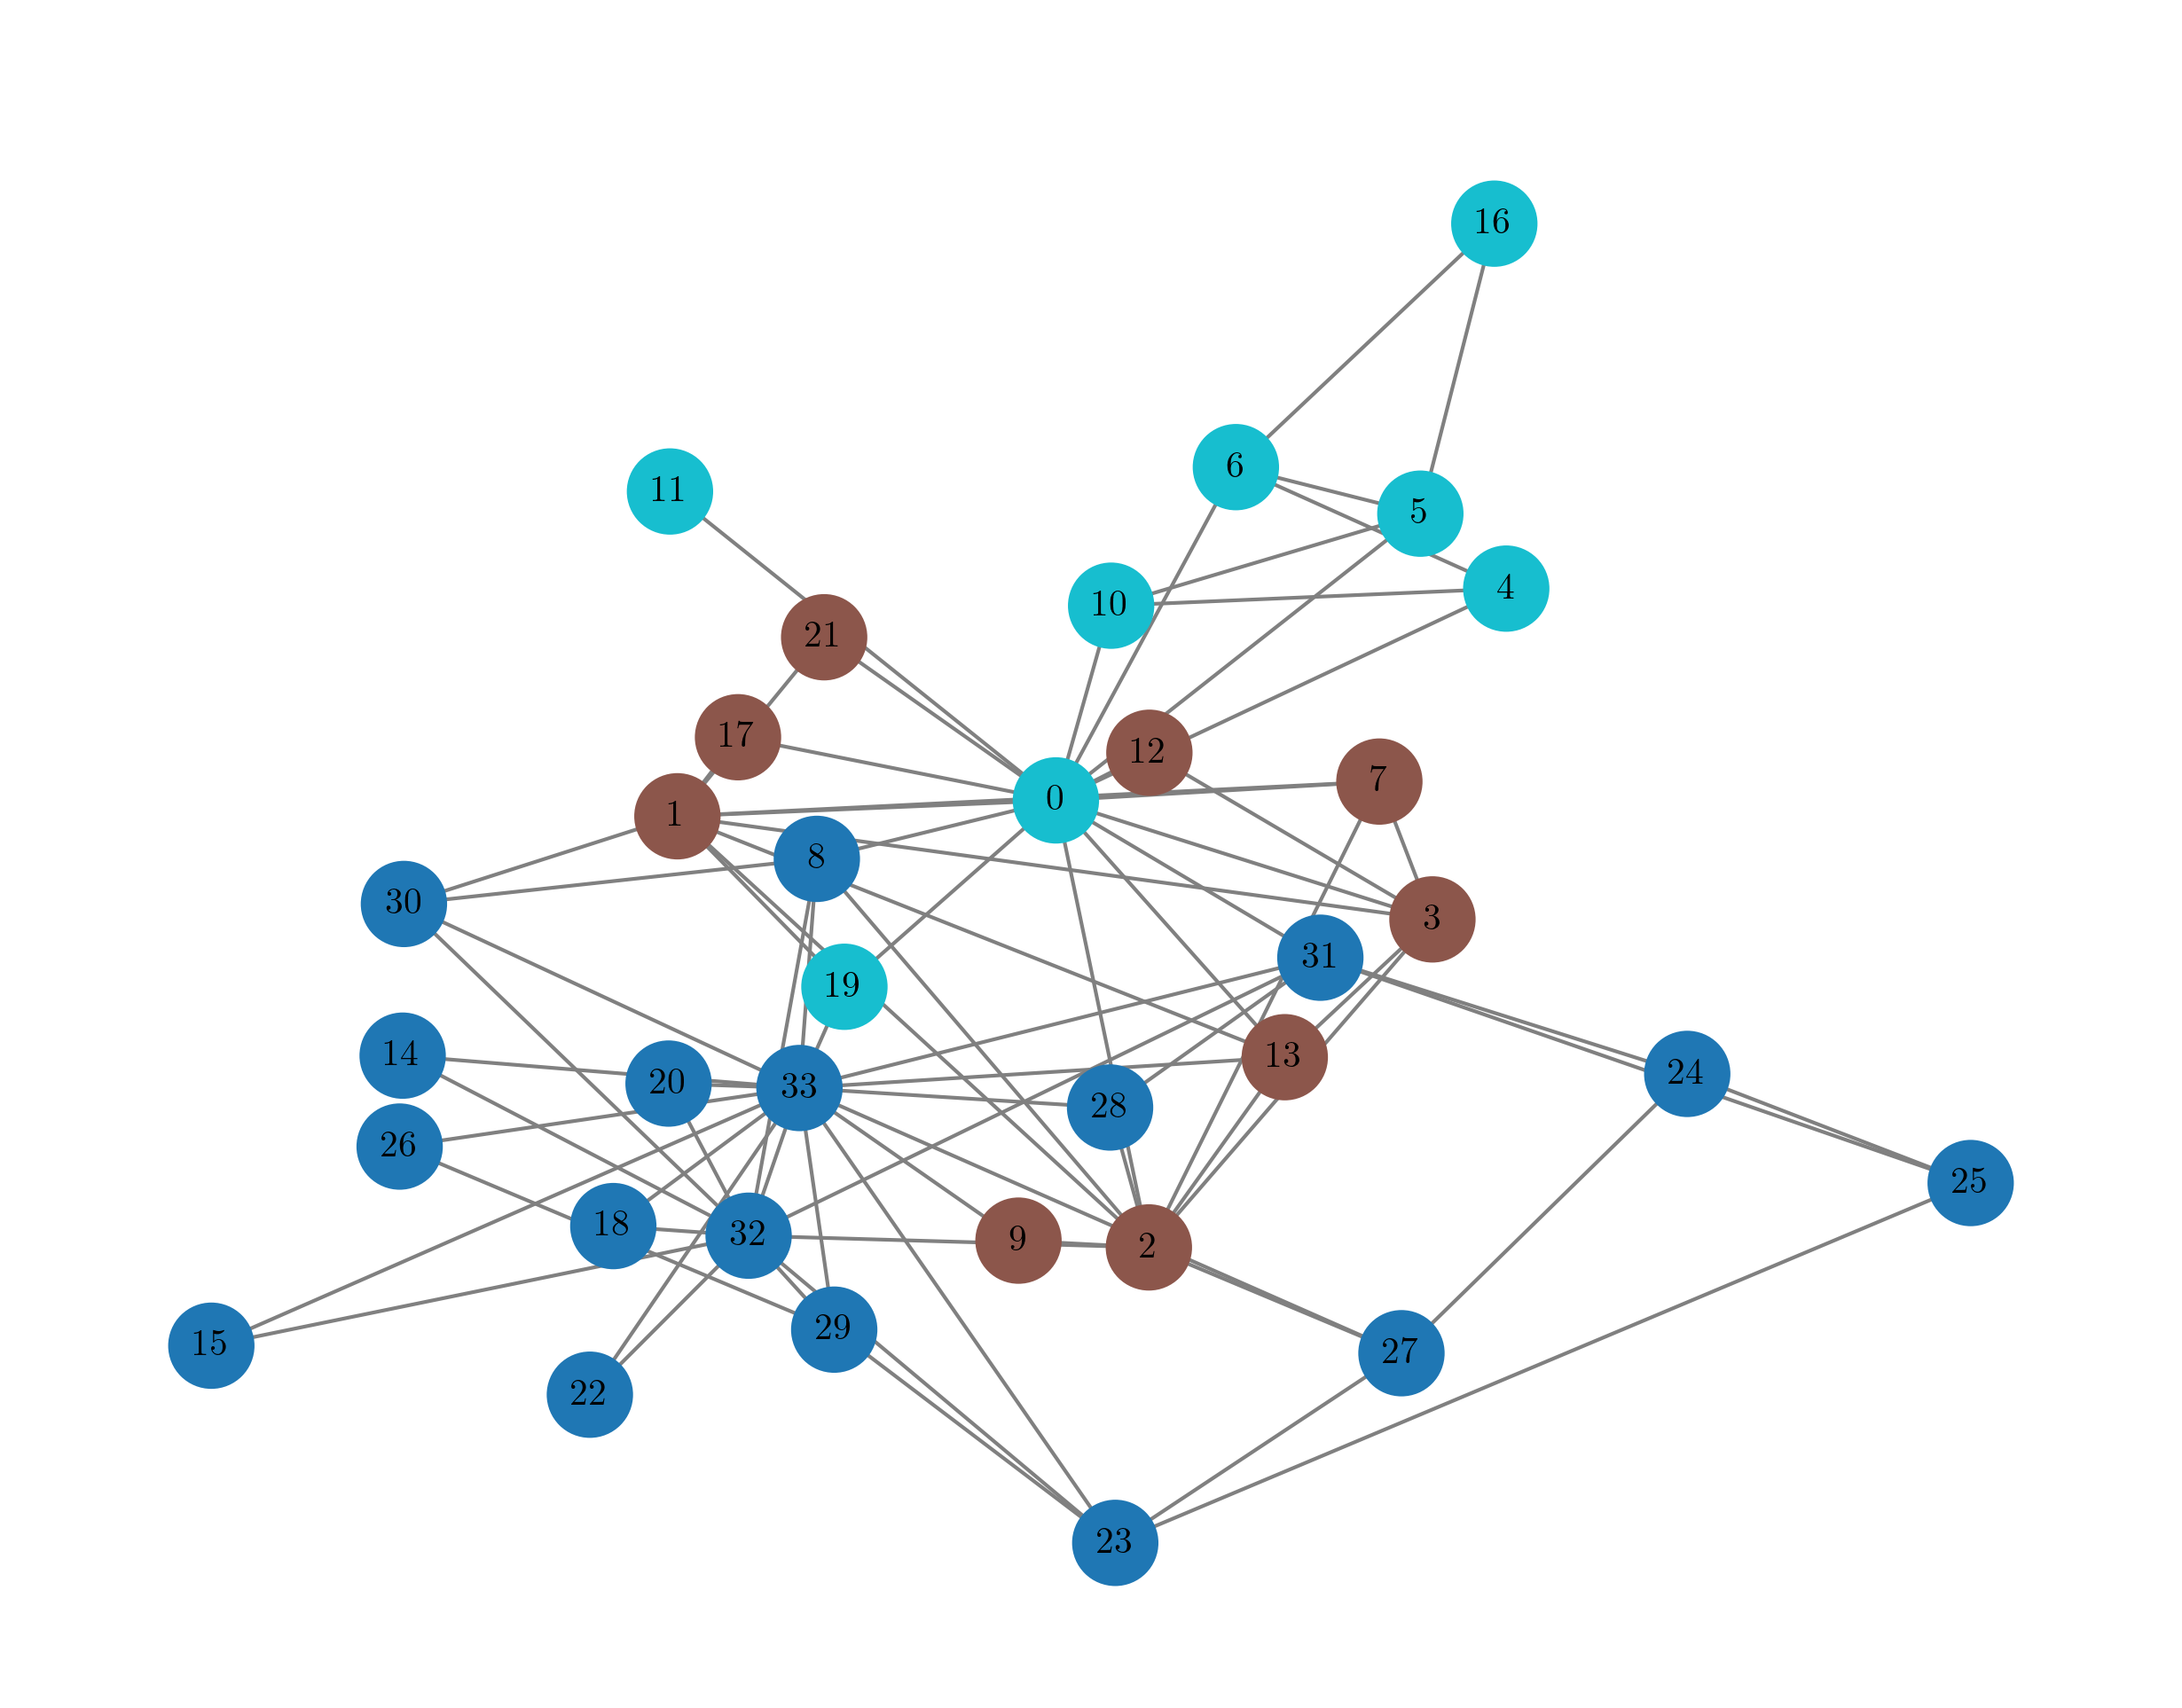

In [39]:
# do community detection and plot with different colors
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G_karate)
# assign a color to each community
color_map = {}
colors = plt.cm.get_cmap('tab10', len(communities))
for i, comm in enumerate(communities):
    for node in comm:
        color_map[node] = colors(i)
# draw the graph with community colors
plt.figure(figsize=(8, 6),
              dpi=300)
node_colors = [color_map[node] for node in G_karate.nodes()]
nx.draw(G_karate, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, font_size=10)
plt.title("Karate Club Graph with Communities")
plt.show()

In [47]:
import networkx as nx
import inspect

datasets = [f for f in dir(nx) if f.endswith("_graph")]
# print available datasets
print("Available datasets in NetworkX:")
for d in datasets:
    print(d)
    func = getattr(nx, d)
    if inspect.isfunction(func):
        print("  ", inspect.signature(func))
        print("  ", inspect.getdoc(func).split("\n")[0])  # print first line of docstring

Available datasets in NetworkX:
LCF_graph
LFR_benchmark_graph
   (n, tau1, tau2, mu, average_degree=None, min_degree=None, max_degree=None, min_community=None, max_community=None, tol=1e-07, max_iters=500, seed=None, *, backend=None, **backend_kwargs)
   Returns the LFR benchmark graph.
adjacency_graph
barabasi_albert_graph
   (n, m, seed=None, initial_graph=None, *, backend=None, **backend_kwargs)
   Returns a random graph using Barabási–Albert preferential attachment
barbell_graph
binomial_graph
   (n, p, seed=None, directed=False, *, backend=None, **backend_kwargs)
   Returns a $G_{n,p}$ random graph, also known as an Erdős-Rényi graph
bull_graph
   (create_using=None, *, backend=None, **backend_kwargs)
   Returns the Bull Graph
caveman_graph
chordal_cycle_graph
chvatal_graph
   (create_using=None, *, backend=None, **backend_kwargs)
   Returns the Chvátal Graph
circulant_graph
circular_ladder_graph
complete_bipartite_graph
   (n1, n2, create_using=None, *, backend=None, **backend_kw

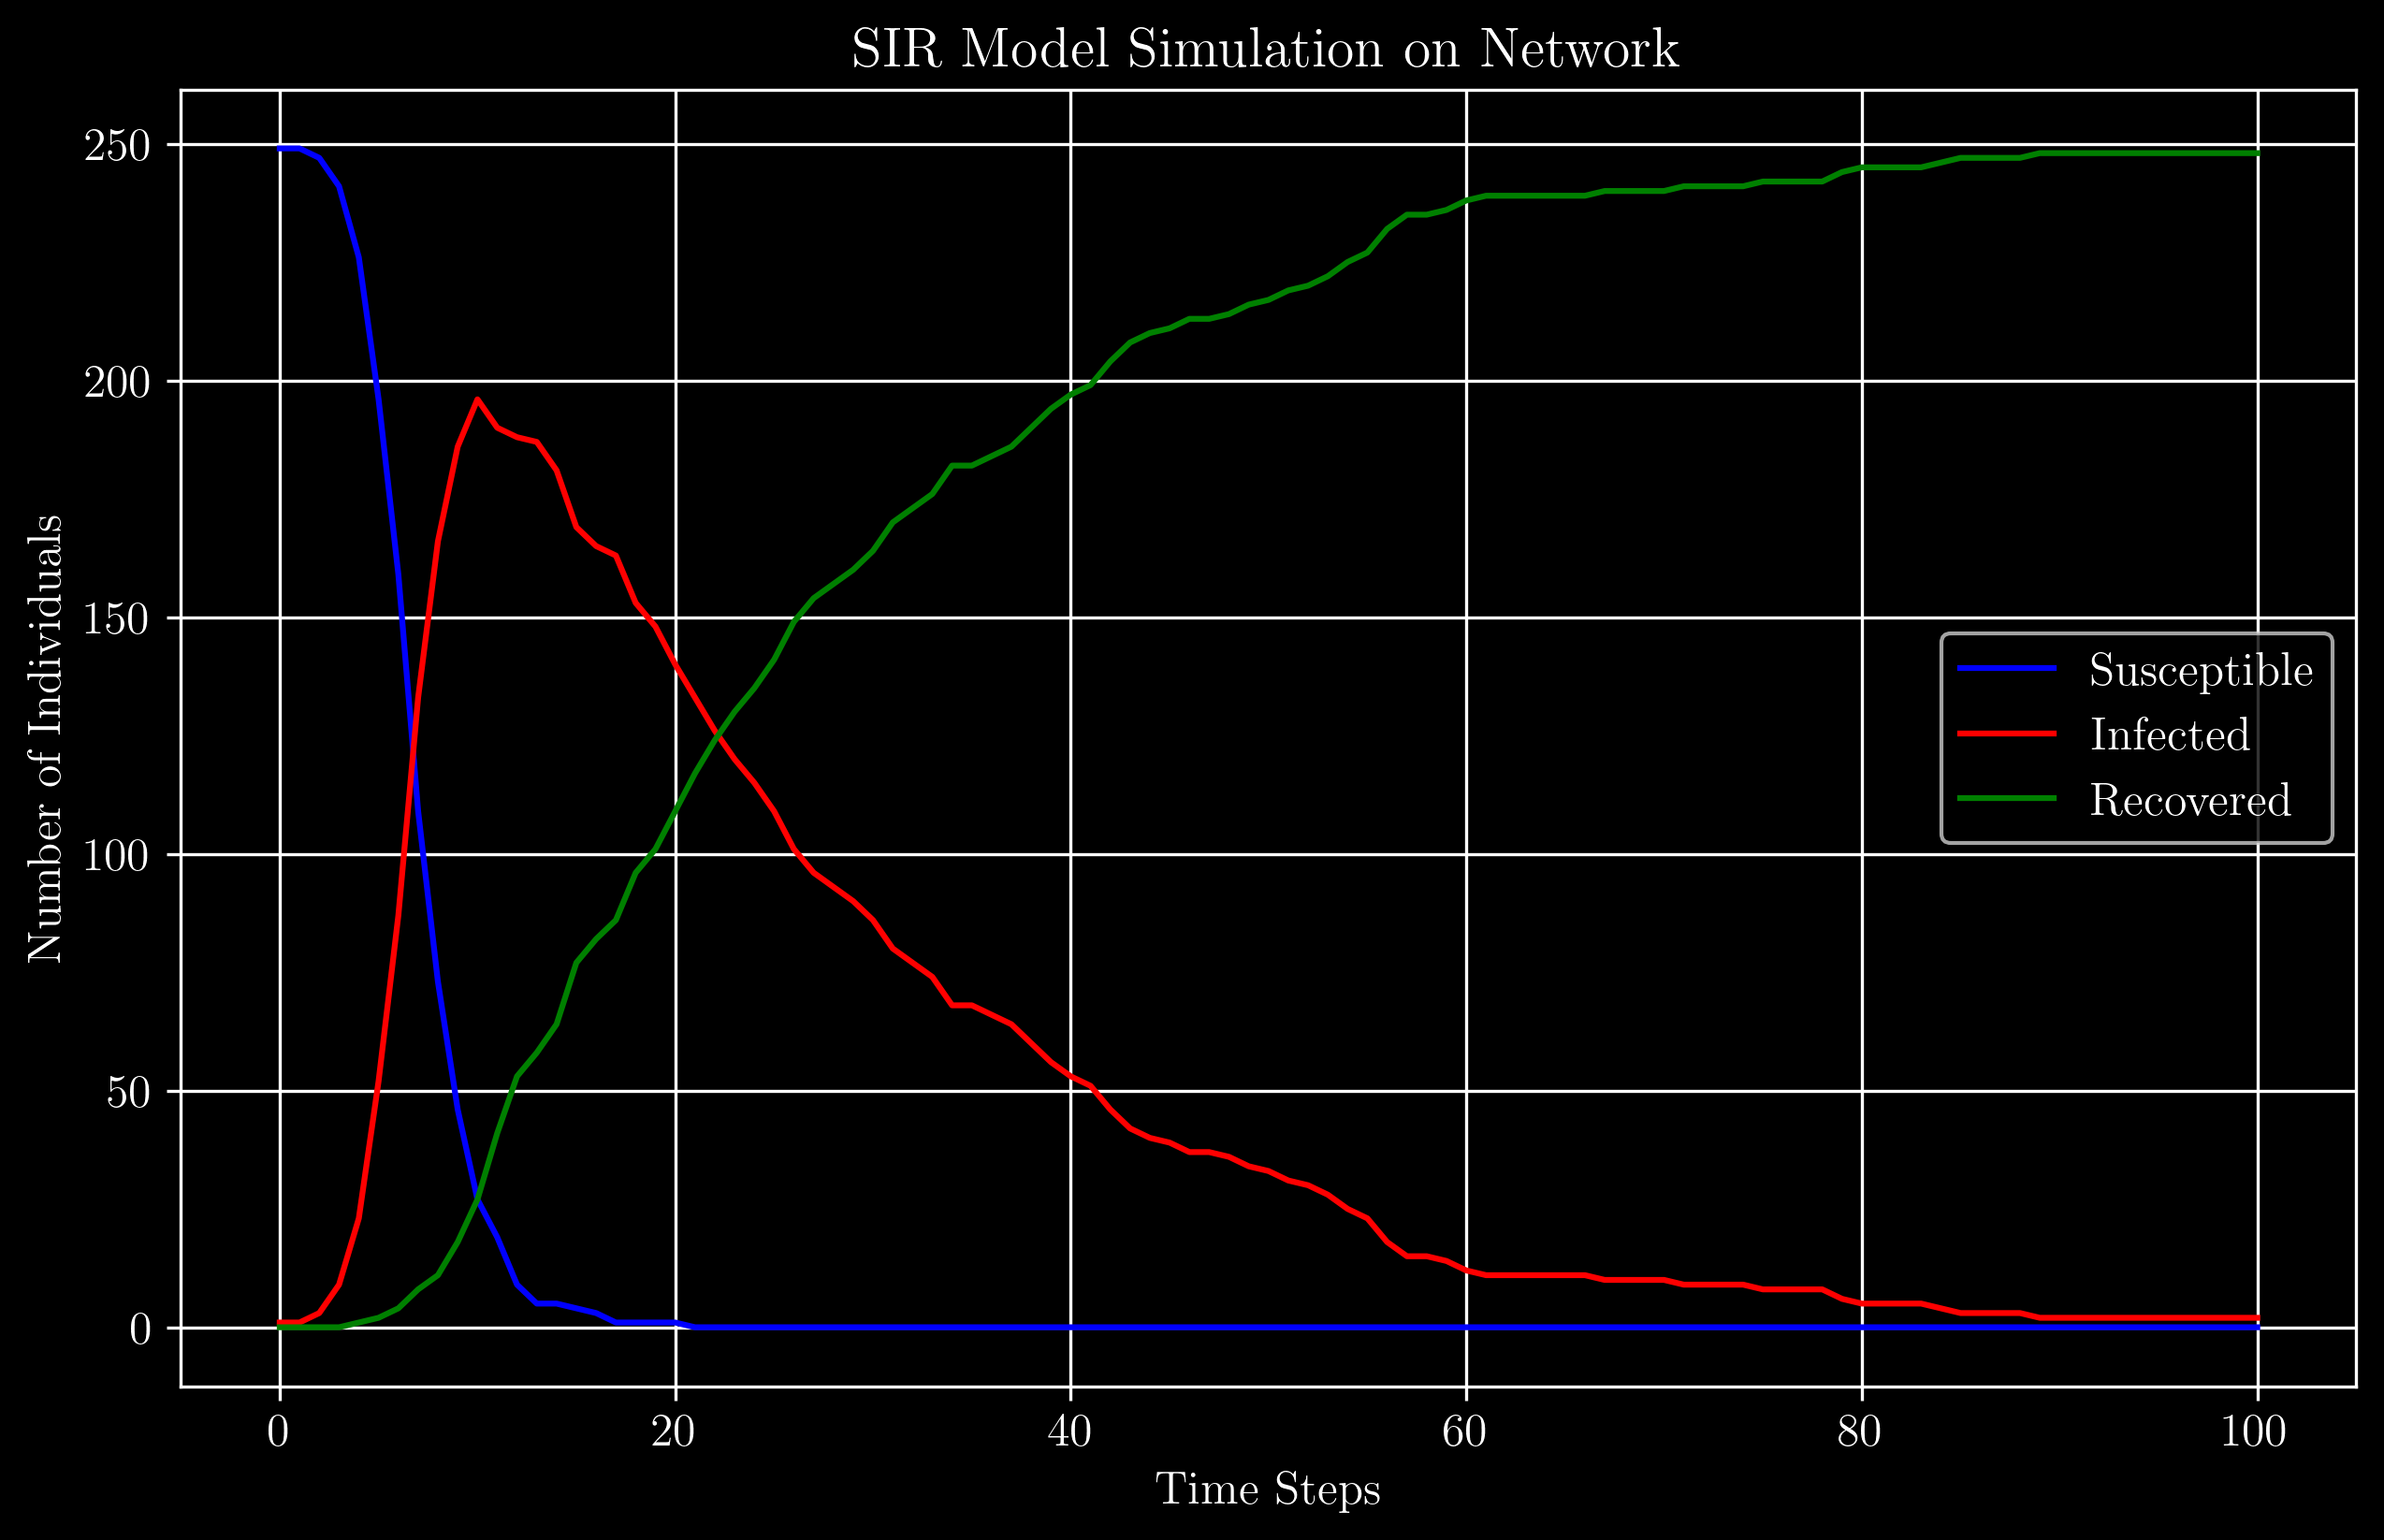

In [68]:
G_barabasi = nx.barabasi_albert_graph(250, 5, seed=42)
G_erdos = nx.erdos_renyi_graph(100, 0.05, seed=42)
G_watts = nx.watts_strogatz_graph(100, 4, 0.1, seed=42)

# -------------------------
# SIR model simulation
# -------------------------
# SIR model simulation on a network
def sir_steps(G, beta=0.1, gamma=0.05, steps=
                100, initial_infected=None, seed=None):
        if seed is not None:
            random.seed(seed)
            np.random.seed(seed)
        
        # Initialize states: S (0), I (1), R (2)
        STATE_SUSCEPTIBLE = 0
        STATE_INFECTED = 1
        STATE_RECOVERED = 2
        
        # Initial state
        state = {node: STATE_SUSCEPTIBLE for node in G.nodes()}
        if initial_infected is None:
            initial_infected = random.choice(list(G.nodes()))
        state[initial_infected] = STATE_INFECTED
        
        history = [state.copy()]
        
        for step in range(steps):
            new_state = state.copy()
            for node in G.nodes():
                if state[node] == STATE_INFECTED:
                    # Try to infect neighbors
                    for neighbor in G.neighbors(node):
                        if state[neighbor] == STATE_SUSCEPTIBLE:
                            if random.random() < beta:
                                new_state[neighbor] = STATE_INFECTED
                    # Try to recover
                    if random.random() < gamma:
                        new_state[node] = STATE_RECOVERED
            state = new_state
            history.append(state.copy())
        
        return history
# Example usage
history = sir_steps(G_barabasi, beta=0.1, gamma=0.05, steps=100, seed=42)
# Plot SIR over time
def plot_sir(history):
    STATE_SUSCEPTIBLE = 0
    STATE_INFECTED = 1
    STATE_RECOVERED = 2
    
    S_counts = []
    I_counts = []
    R_counts = []
    
    for state in history:
        S_counts.append(sum(1 for s in state.values() if s == STATE_SUSCEPTIBLE))
        I_counts.append(sum(1 for s in state.values() if s == STATE_INFECTED))
        R_counts.append(sum(1 for s in state.values() if s == STATE_RECOVERED))
    
    plt.figure(figsize=(10, 6), dpi=300)
    plt.plot(S_counts, label='Susceptible', color='blue')
    plt.plot(I_counts, label='Infected', color='red')
    plt.plot(R_counts, label='Recovered', color='green')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Individuals')
    plt.title('SIR Model Simulation on Network')
    plt.legend()
    plt.grid()
    plt.show()
plot_sir(history)
#!/usr/bin/env python3

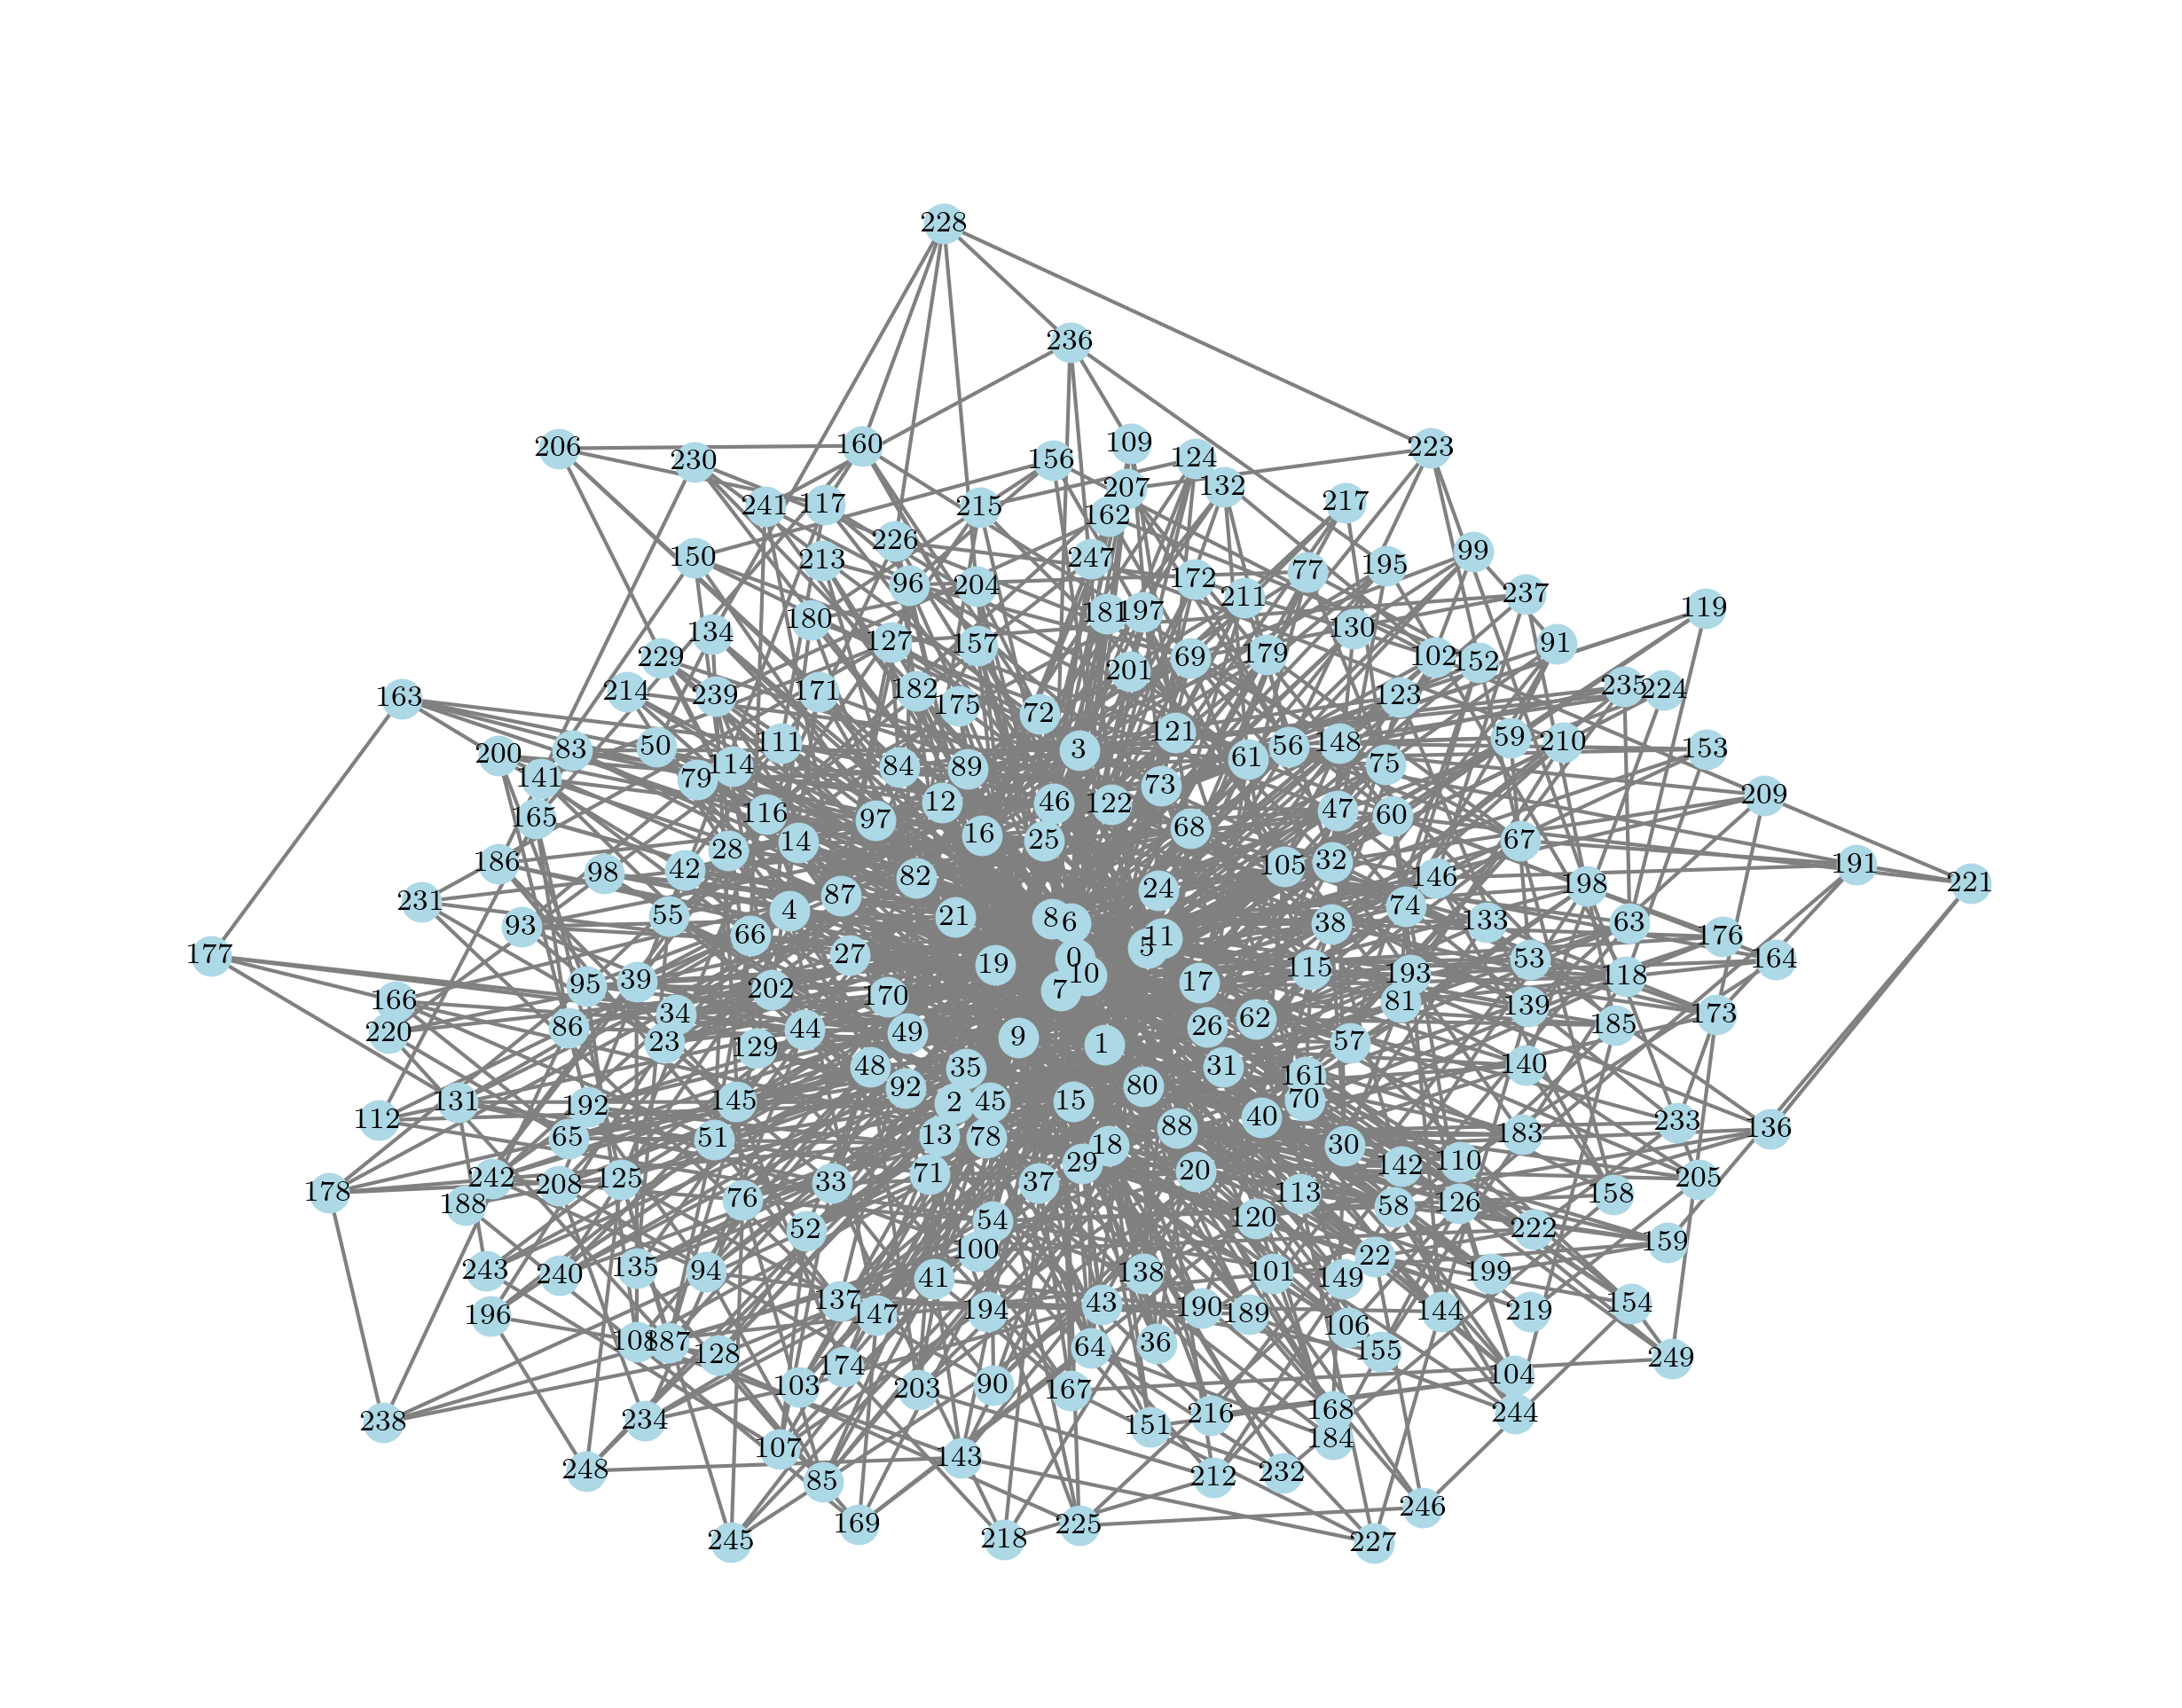

In [65]:
# plot the graph used for sir simulatuin
plt.figure(figsize=(8, 6),
              dpi=300)
pos = nx.spring_layout(G_barabasi, seed=42)  # positions for all nodes
nx.draw(G_barabasi, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=100, font_size=8)
plt.title("Barabási-Albert Graph")
plt.show()

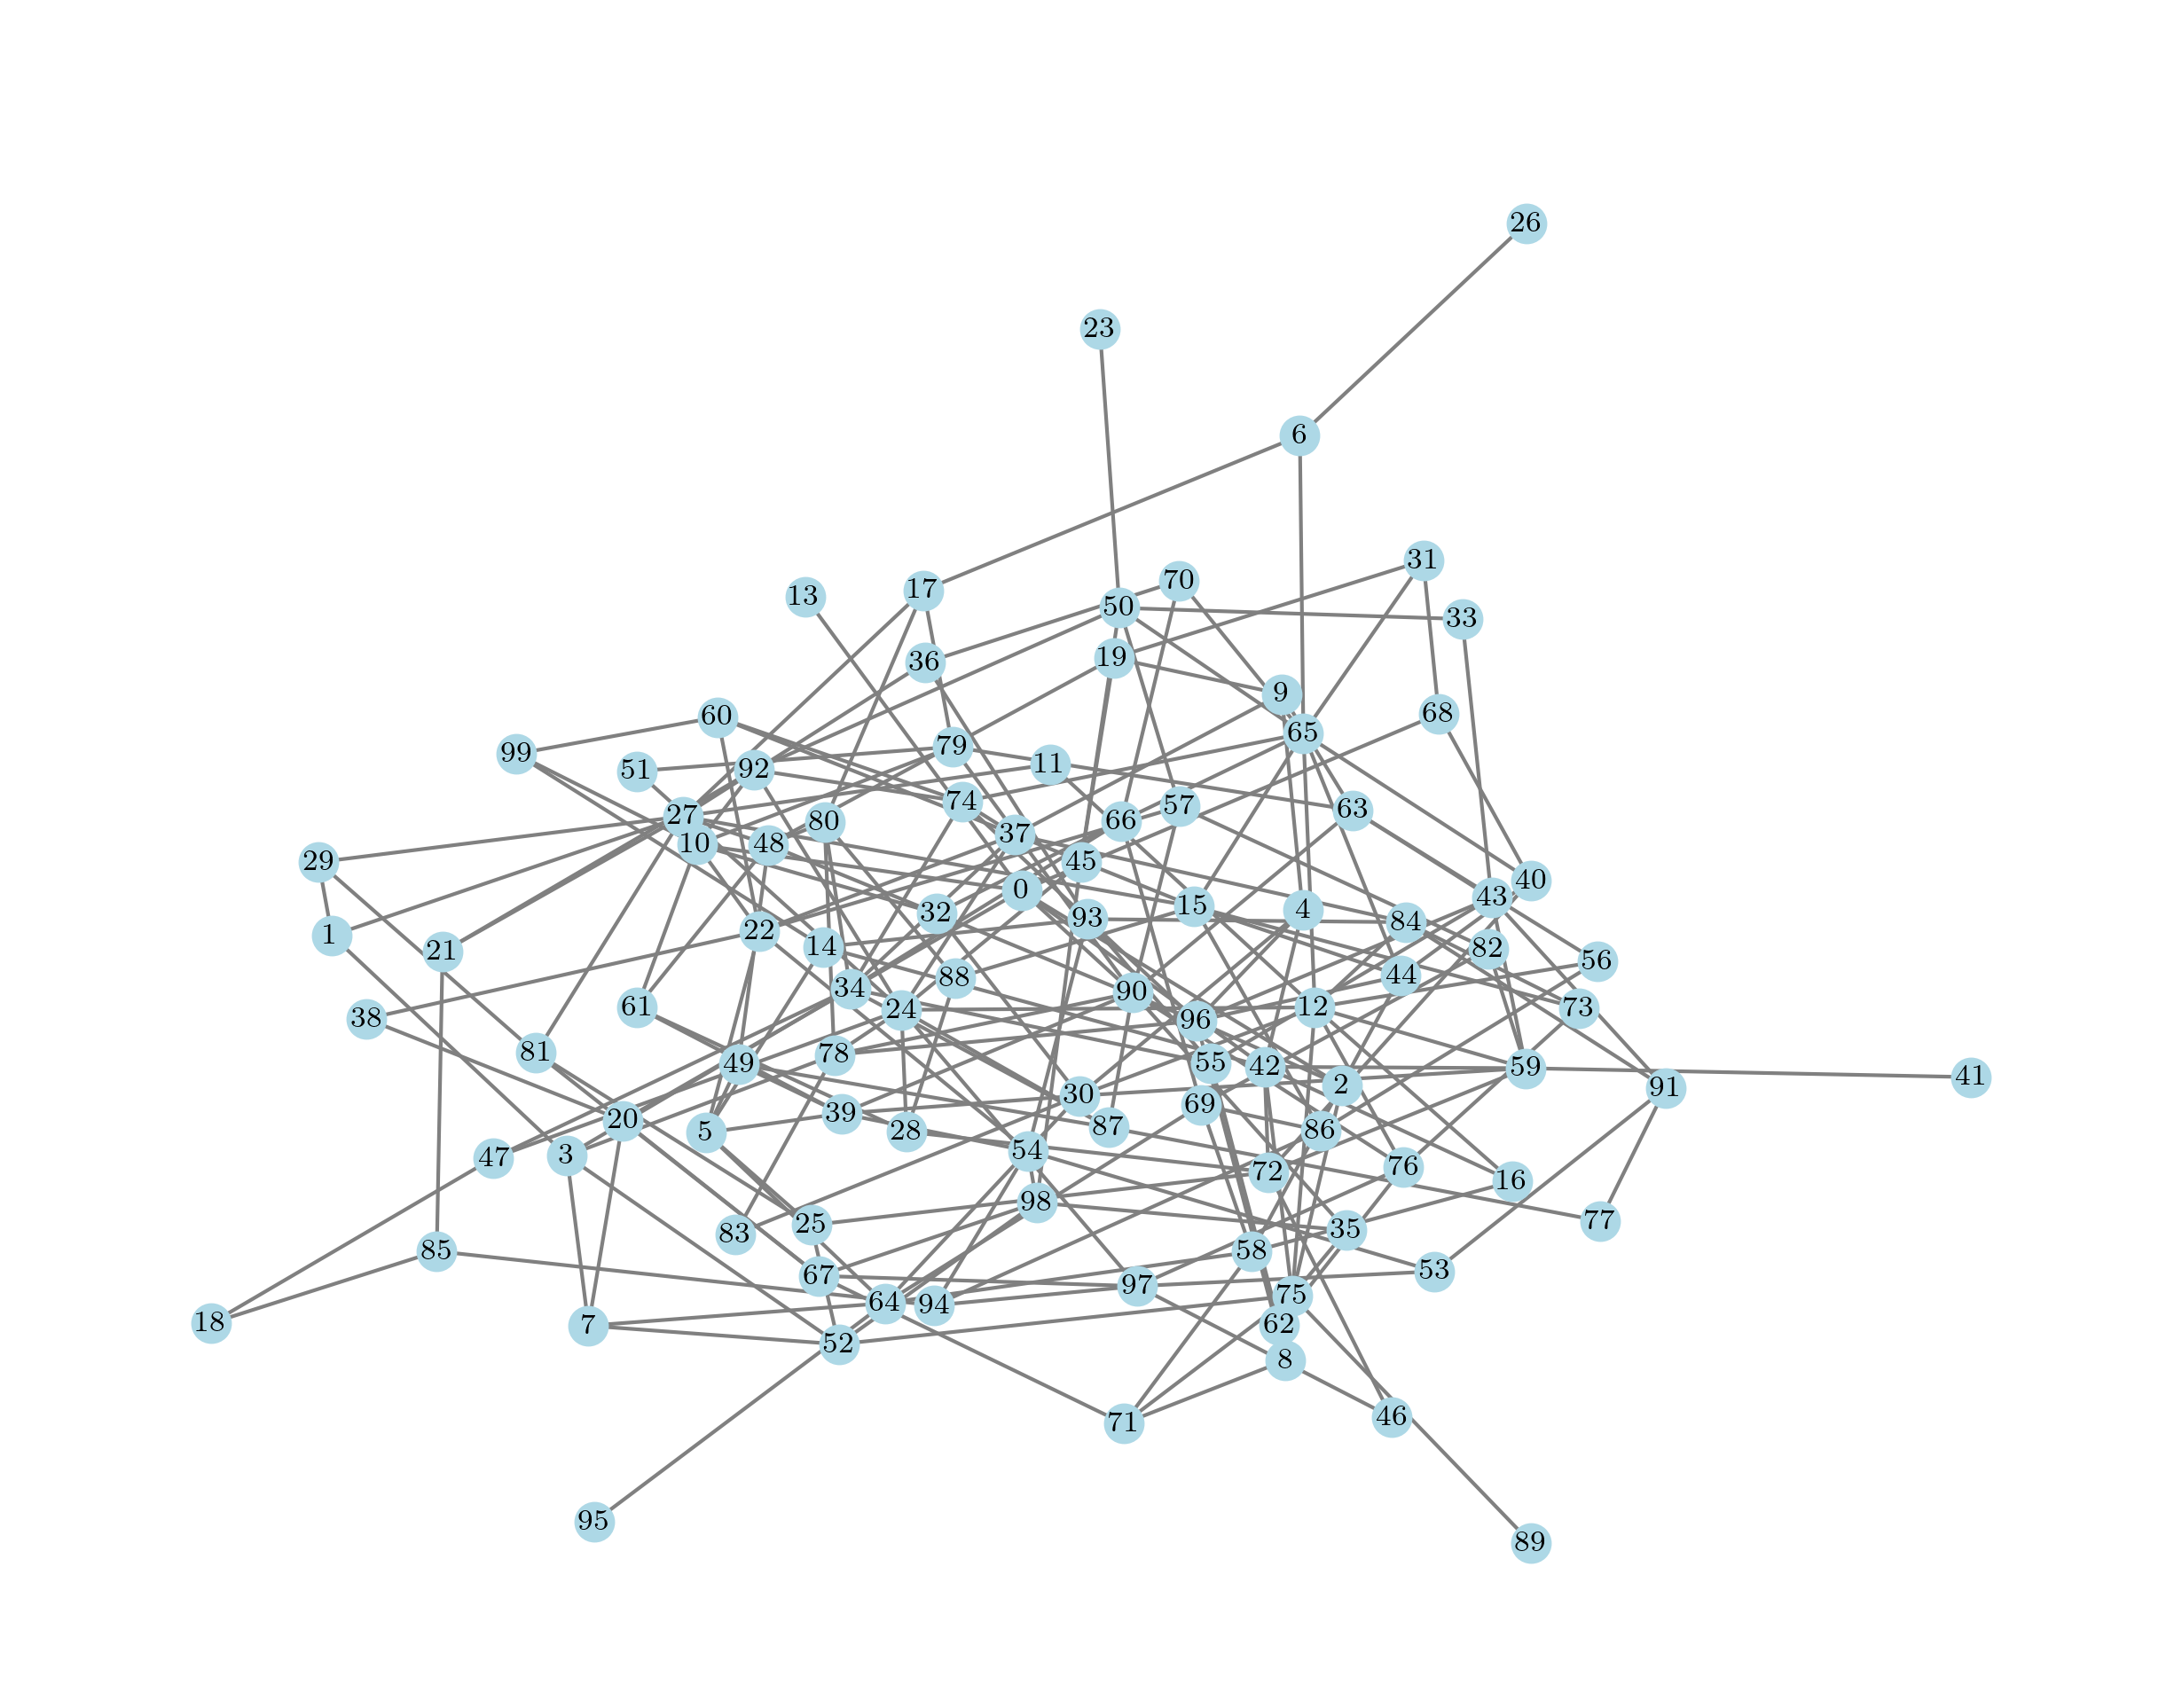

In [69]:
# do the same with endos renyi
plt.figure(figsize=(8, 6),
              dpi=300)
pos = nx.spring_layout(G_erdos, seed=42)  # positions for all nodes
nx.draw(G_erdos, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=100, font_size=8)
plt.title("Erdős-Rényi Graph")
plt.show()